<a href="https://colab.research.google.com/github/mahin-arvind/Bike-Sharing-Demand-Prediction-Capstone-Project/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [3]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
path1 = '/content/drive/MyDrive/Datasets/Regression/Bike Sharing Demand Prediction/Data & Resources/SeoulBikeData.csv'
df = pd.read_csv(path1, encoding= 'unicode_escape')

In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.shape

(8760, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec



---
>* **The bike sharing demand dataset has 14 features and 8760 rows.**
>
>* **There are 4 categorical attributes and 10 numerical attributes**
>
>* **'Rented Bike Count' is the attribute we aim to predict**
>
>* **The data does not have any null values**
---




Statistical Information on Numerical features

In [9]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Looking for duplicates rows

In [10]:
len(df[df.duplicated()])

0




---


> * **No Duplicate rows present in the Dataset**




---






#Exploratory Data Analysis

**Categorizing features as numerical and categorical**

In [11]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [32]:
numerical_features = [ftr for ftr in df.columns if df[ftr].dtype != 'O'] 
categorical_features = [ftr for ftr in df.columns if df[ftr].dtype == 'O'] 
target = ['Rented Bike Count']
numerical_features.remove(target[0])

## Univariate Analysis

###Distribution of Numerical Features

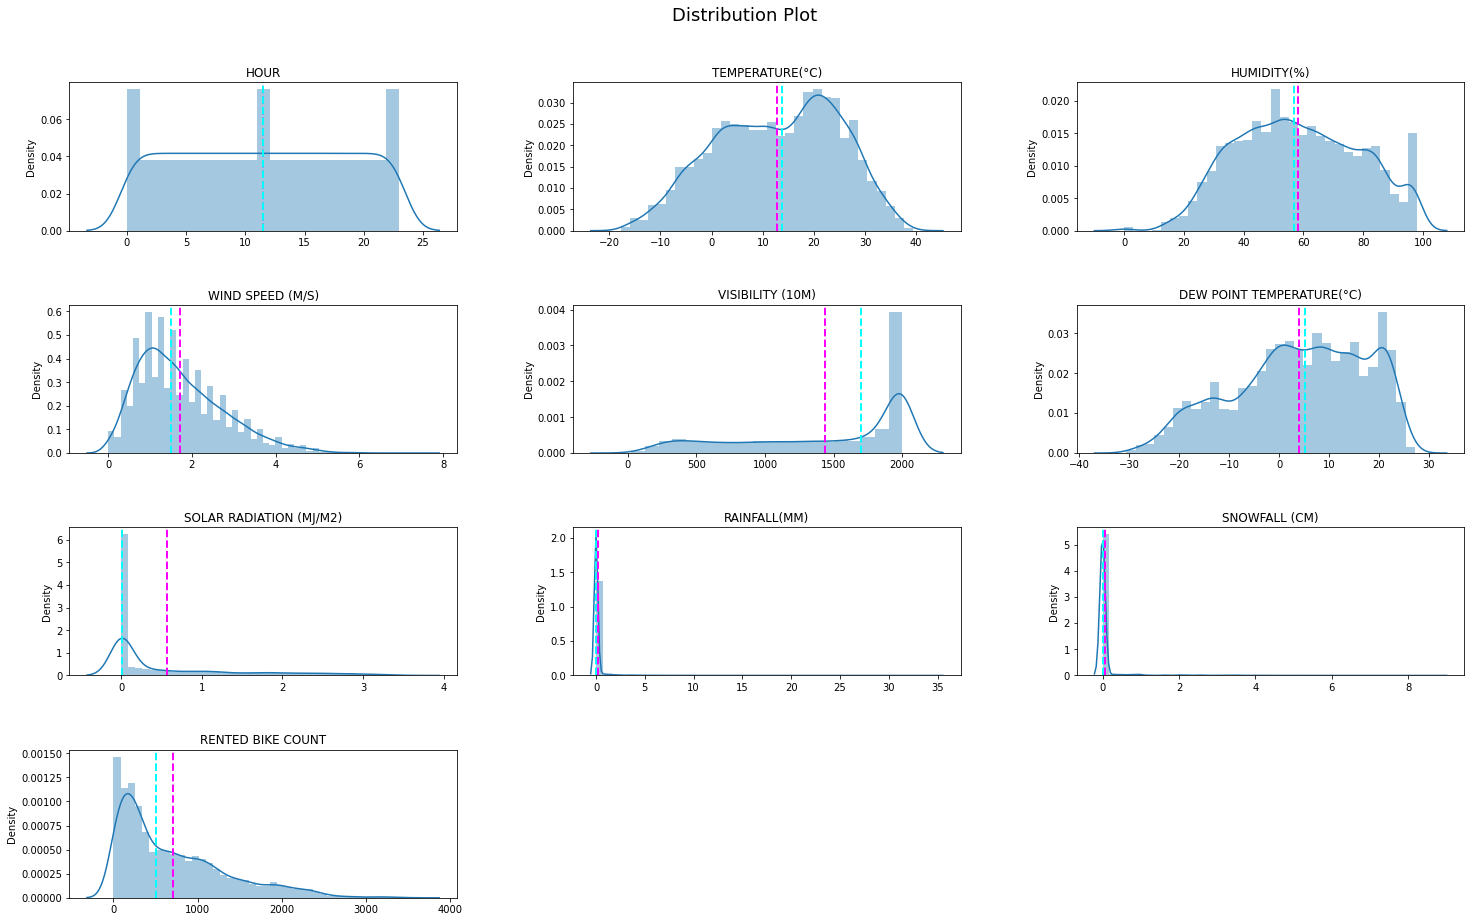

In [34]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(25, 15))
plt.suptitle("Distribution Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(numerical_features + target):
  # add a new subplot iteratively
  ax = plt.subplot(4,3, n + 1)
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  # filter df and plot ticker on the new subplot axis
  sns.distplot(df[ticker])
  plt.axvline(df[ticker].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[ticker].median(), color='cyan', linestyle='dashed', linewidth=2)   
  ax.set_title(ticker.upper())
  ax.set_xlabel("")




---
> * **Other than 'Hour', all numerical features exhibit some resemblance to a normal distribution.**       
> * **The distribution for numerical features like Rented Bike Count,  Solar Radiation and Visibility appear highly skewed, indicating the presence of large outliers.**
---


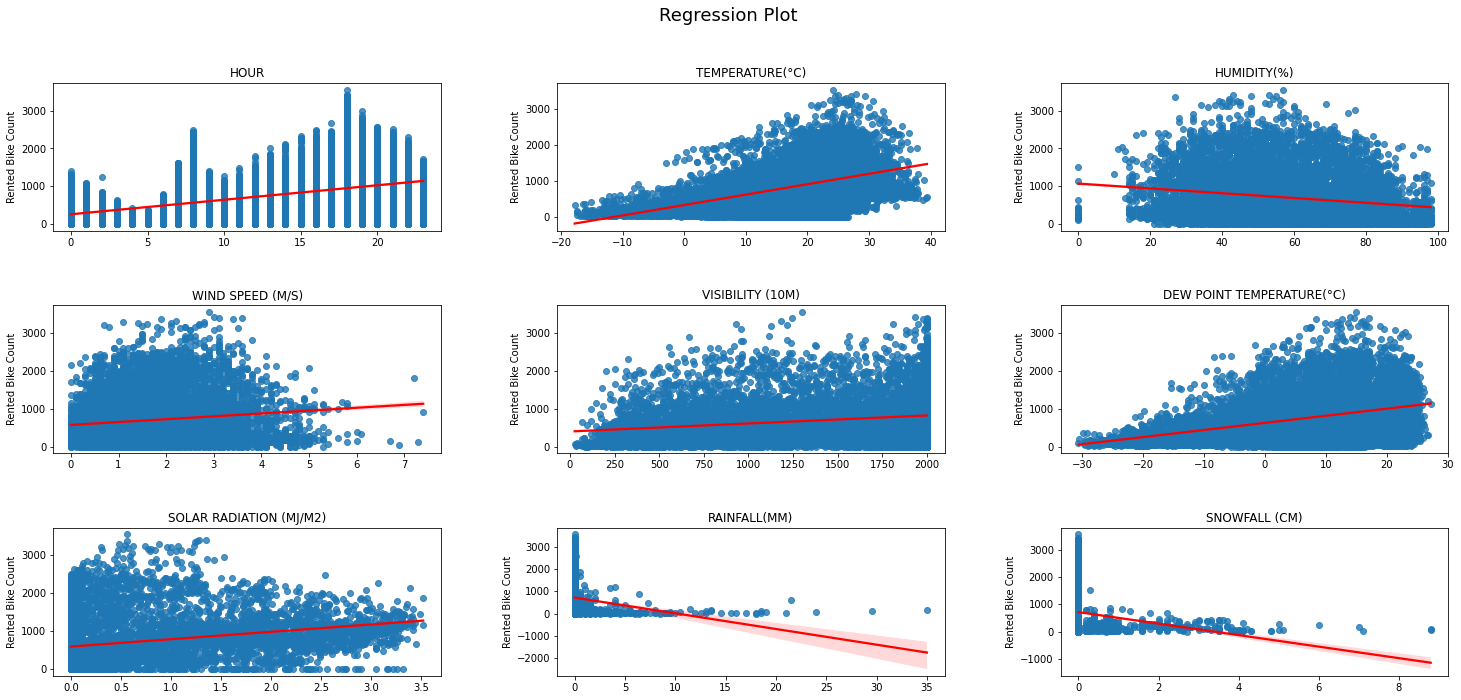

In [37]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(25, 15))
plt.suptitle("Regression Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(numerical_features):
  # add a new subplot iteratively

  # filter df and plot ticker on the new subplot axis
  ax = plt.subplot(4,3, n+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  sns.regplot(x=df[ticker],y=df[target],line_kws={"color": "red"})   
  ax.set_title(ticker.upper())
  ax.set_xlabel("")



###Feature Extraction
---
**In order to get deeper insights, we'll be extracting features from the date column. The relevant features extracted will be:**
1.   Weekend: Boolean variable tells if the day falls on a weekend
2.   day of the week
3.   Month
**Features extracted from hour column will be:**
4. Day Phase: Morning, Afternoon,Evening and Night
---






Extracting features from Date column

In [50]:
import datetime as dt
a = df['Date'].iloc[1]

In [52]:
d

'Thursday'

In [57]:
df['Date']=pd.to_datetime(df['Date'])

a = df['Date'].dt.day_name()
df['Weekend']= a.apply(lambda x : 'Yes' if x=='Saturday' or x=='Sunday' else 'No' )
df['DayName'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].apply(lambda x : x.month)

df=df.drop(columns=['Date'],axis=1)
categorical_features.remove('Date')
categorical_features = categorical_features + ['Weekend','DayName','Month']

In [71]:
def phase_day(row):
  
  if 6 <= int(row['Hour']) <=11:
    return 'Morning'

  if 12 <= int(row['Hour'])< 18:
    return 'AfterNoon'

  if 18 <= int(row['Hour'])<=21:
    return 'Evening'

  if 22 <= int(row['Hour']) or int(row['Hour']) < 6  :
    return 'Night'
  
df['Day Phase'] = df.apply(lambda row: phase_day(row), axis =1)
categorical_features.append('Day Phase')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekend                    8760 non-null   objec

In [74]:
for col in categorical_features:
  print(col, df[col].unique(), '\n')

Seasons ['Winter' 'Spring' 'Summer' 'Autumn'] 

Holiday ['No Holiday' 'Holiday'] 

Functioning Day ['Yes' 'No'] 

Weekend ['No' 'Yes'] 

DayName ['Thursday' 'Sunday' 'Wednesday' 'Friday' 'Monday' 'Saturday' 'Tuesday'] 

Month [ 1  2  3  4  5  6  7  8  9 10 11 12] 

Day Phase ['Night' 'Morning' 'AfterNoon' 'Evening'] 



In [ ]:
sns.c

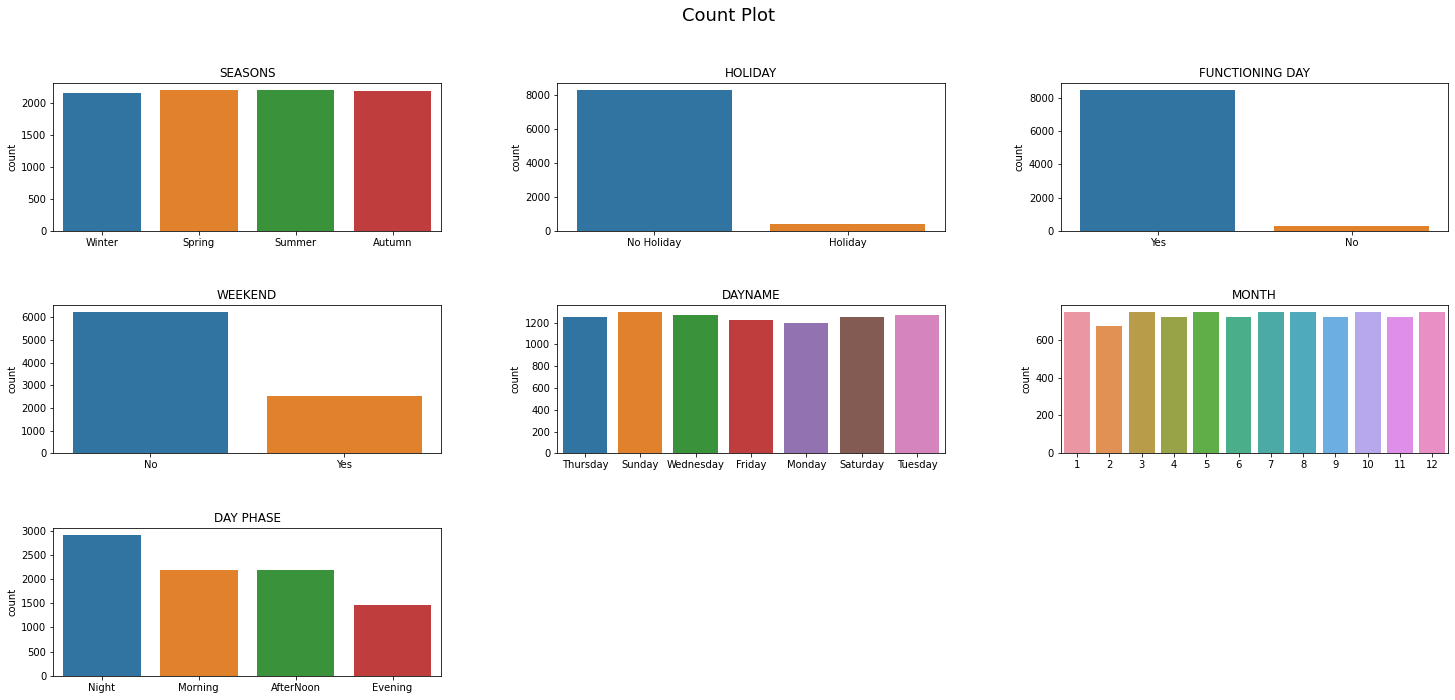

In [78]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(25, 15))
plt.suptitle("Count Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(categorical_features):
  # add a new subplot iteratively

  # filter df and plot ticker on the new subplot axis
  ax = plt.subplot(4,3, n+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  sns.countplot(x=df[ticker])   
  ax.set_title(ticker.upper())
  ax.set_xlabel("")



#Feature Engineering and Selection